In [1]:
import matplotlib.pyplot as plt
import random, operator, numpy
import tsplib95
import numpy as np

from deap import algorithms, base, creator, tools

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams['figure.dpi']= 1200

In [2]:
def generate_distances(cities):
    n_cities = len(cities)
    distances = np.zeros((n_cities, n_cities))
    for from_city in range(n_cities):   
        for to_city in range(n_cities):
            distances[to_city][from_city] = distances[from_city][to_city] = tsplib95.distances.euclidean(cities[from_city], cities[to_city])
    return distances

In [14]:
def evaluate(individual):
    res = []
    for i in range(len(individual) - 1):
        res.append(distances[individual[i - 1]][individual[i]])
    return (sum(res),)

In [4]:
def make_preparations(cities, population_size, indp, tournsize):
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()

    toolbox.register("indices", np.random.permutation, len(cities))
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate)
    toolbox.register("mate", tools.cxPartialyMatched)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=indp)
    toolbox.register("select", tools.selTournament, tournsize=tournsize)
    
    stats = tools.Statistics(key=lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    return toolbox, stats

In [5]:
def plot_tour(best_ind_route, best_len):
    plt.plot([p[0] for p in best_ind_route],[p[1] for p in best_ind_route], '-o')
    plt.title(f'Len: {round(best_len, 2)}')
    plt.show()
    
def plot_stats(gen, fit_mins, size_avgs):
    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Length")
    ax2.set_ylabel("Length", color="r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="center right")

    plt.show()

In [18]:
def iterate(cities, iterations=1500, population_size=300):
    mutation_probability = 0.6
    crossover_probability = 0.4

    toolbox, stats = make_preparations(cities, population_size, indp=0.02, tournsize=50)
    population = toolbox.population(n = population_size)
    result, log = algorithms.eaSimple(population, toolbox, 
                                      cxpb=crossover_probability, mutpb=mutation_probability, 
                                      ngen=iterations, stats=stats, verbose=False)

    best_individual = tools.selBest(result, k=1)[0]
    best_individual_route = [cities[p] for p in best_individual]
    best_len = evaluate(best_individual)[0]
    print('\nFitness of the best individual: ', best_len)
    plot_tour(best_individual_route, best_len)
    plot_stats(log.select("gen"), log.select("min"), log.select("avg"))

In [19]:
def cities_from_problem(path):
    problem = tsplib95.load_problem(path)
    cities = list(problem.node_coords.values())
    return cities, generate_distances(cities)


Fitness of the best individual:  1131.0


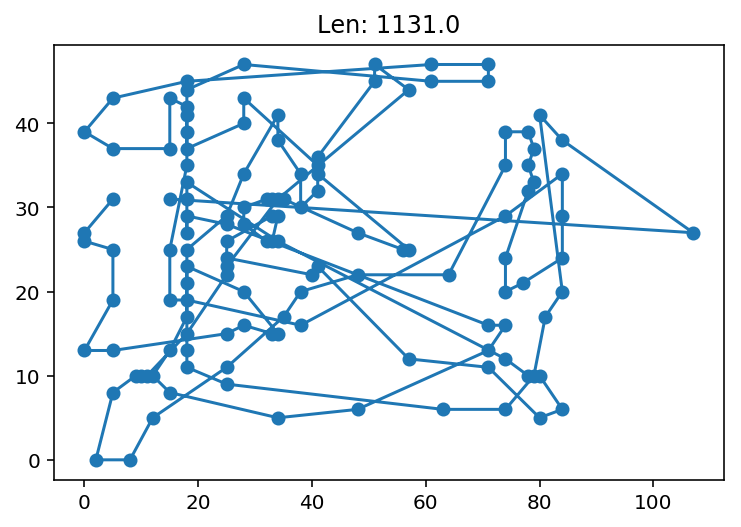

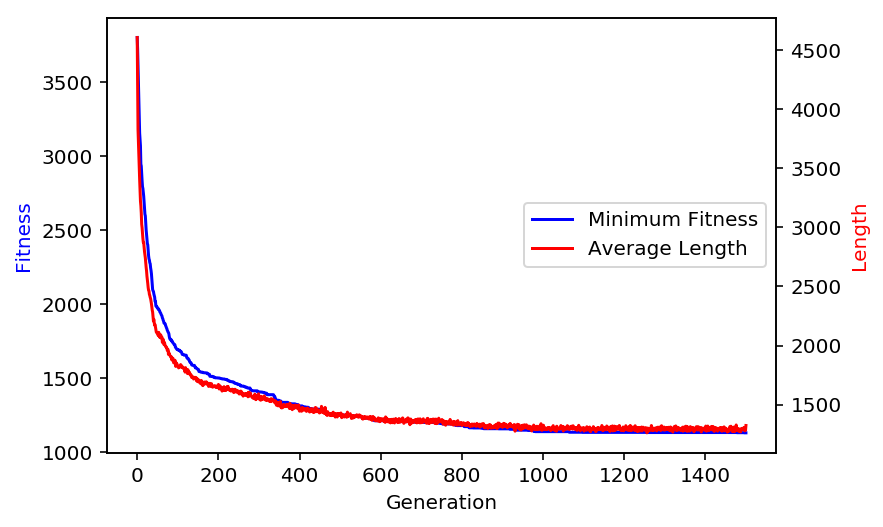


Fitness of the best individual:  3444.0


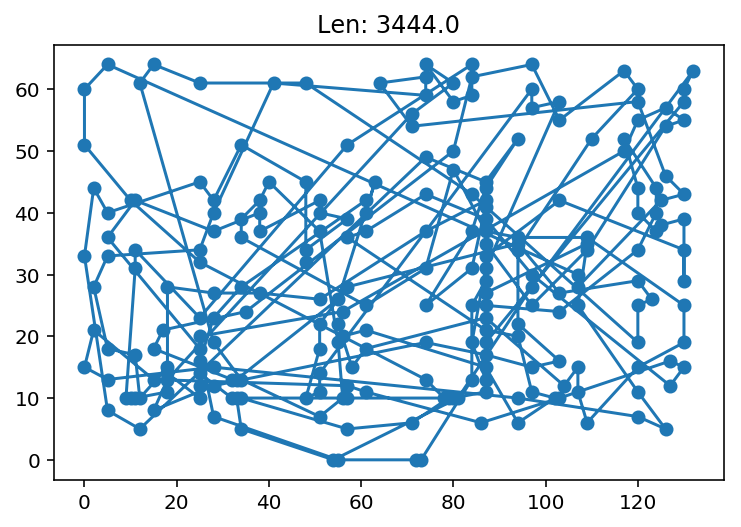

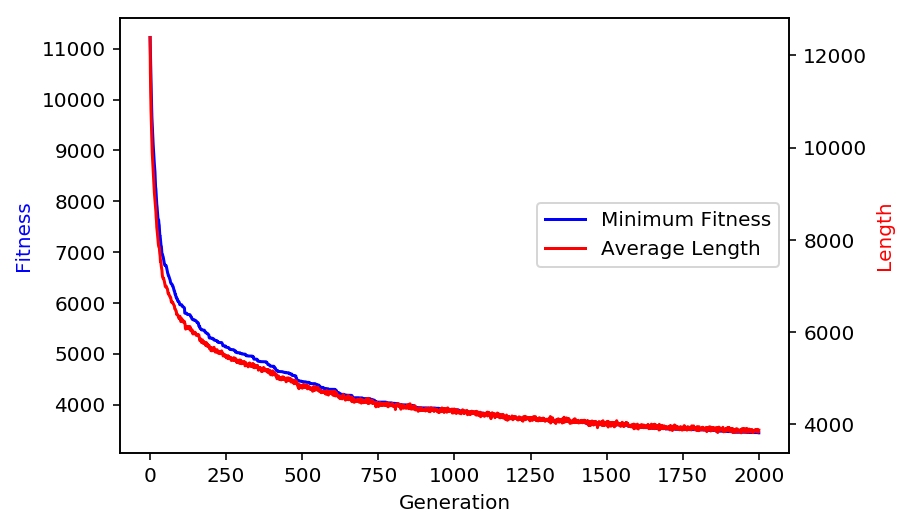


Fitness of the best individual:  10116.0


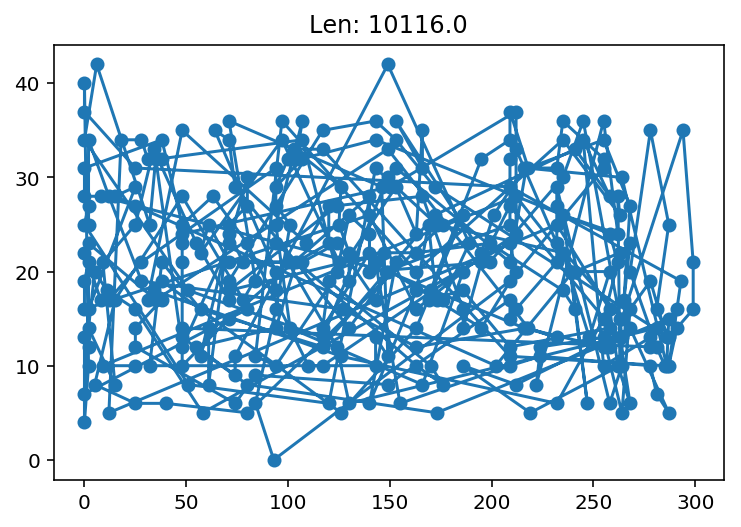

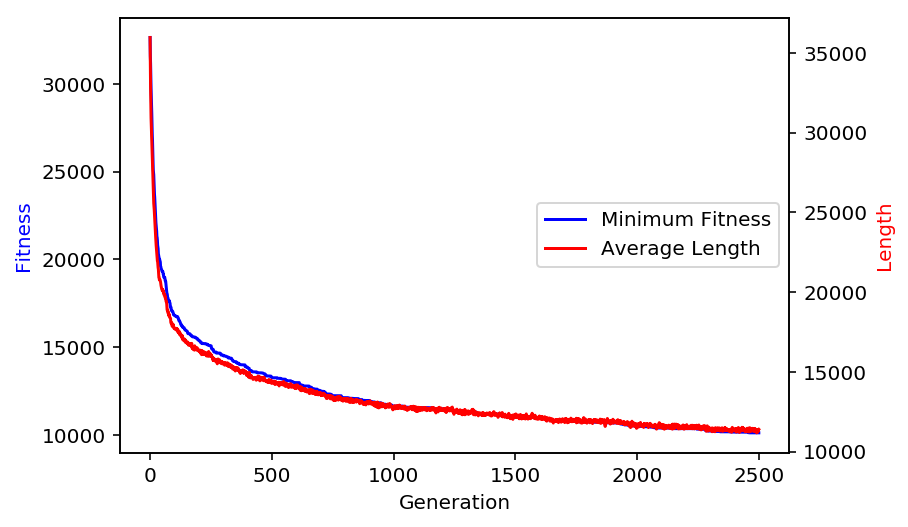

In [20]:
cities, distances = cities_from_problem('xqf131.tsp')
iterate(cities)

cities, distances = cities_from_problem('xqg237.tsp')
iterate(cities, iterations=2000)

cities, distances = cities_from_problem('pma343.tsp')
iterate(cities, iterations=2500)